# Import Library

In [343]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OrdinalEncoder
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

# Read Data

In [344]:
path = "/Users/irene/CloudStation/Portfolio/Bank Customer Churn Data Analysis/cleaned_data.csv"
df = pd.read_csv(path)

In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22067 entries, 0 to 22066
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      22067 non-null  int64  
 1   customer_id                     22067 non-null  int64  
 2   vintage                         22067 non-null  int64  
 3   age                             22067 non-null  int64  
 4   gender                          22067 non-null  object 
 5   dependents                      22067 non-null  int64  
 6   occupation                      22067 non-null  object 
 7   city                            22067 non-null  float64
 8   customer_nw_category            22067 non-null  int64  
 9   branch_code                     22067 non-null  int64  
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

In [346]:
df = df.drop(['Unnamed: 0'], axis=1)

In [347]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction,week_of_year,day_of_year,month_of_year,day_of_week
0,1,2101,66,Male,0,self_employed,187.0,2,755,1458.71,...,0.20,0.20,1458.71,1458.71,0,2019-05-21,21.0,141.0,5.0,1.0
1,6,1579,42,Male,2,self_employed,1494.0,3,388,927.72,...,588.62,1538.06,1157.15,1677.16,1,2019-11-03,44.0,307.0,11.0,6.0
2,7,1923,42,Female,0,self_employed,1096.0,2,1666,15202.20,...,857.50,286.07,15719.44,15349.75,0,2019-11-01,44.0,305.0,11.0,4.0
3,8,2048,72,Male,0,retired,1020.0,1,1,7006.93,...,1299.64,439.26,7076.06,7755.98,0,2019-09-24,39.0,267.0,9.0,1.0
4,9,2009,46,Male,0,self_employed,623.0,2,317,10096.58,...,443.13,5688.44,8563.84,5317.04,0,2019-07-12,28.0,193.0,7.0,4.0


# Model Selection

The goal is to identify the type of customer more likely to churn, and we've chosen logistic regression as the model for this task

Logistic regression can help determine which customer features are associated with churn and predict the probability of a customer leaving the bank

# Data Preparation


## Data distribution

### Numeric

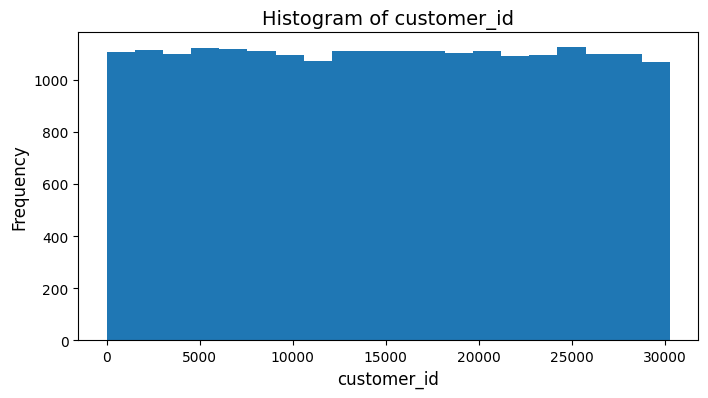

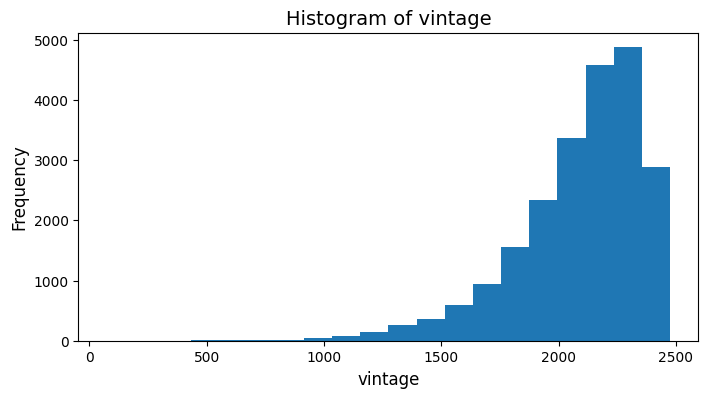

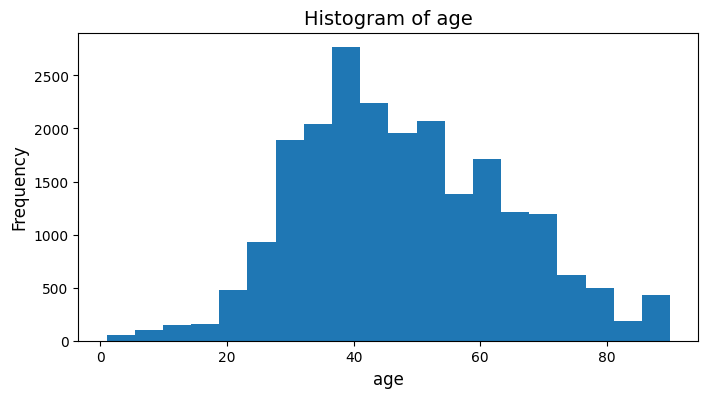

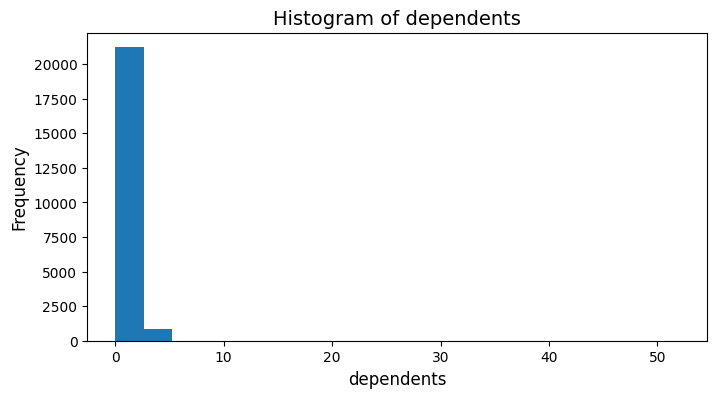

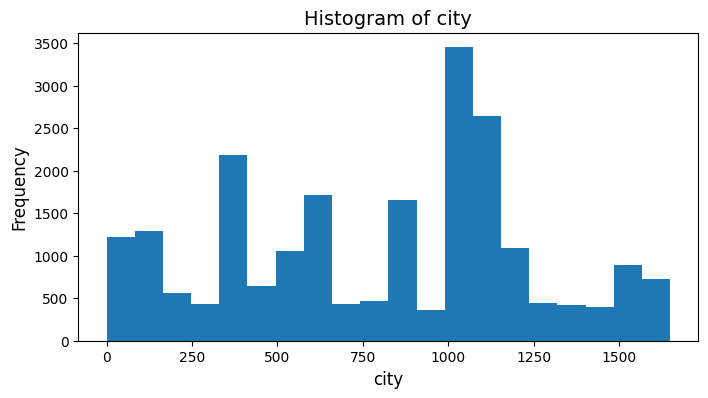

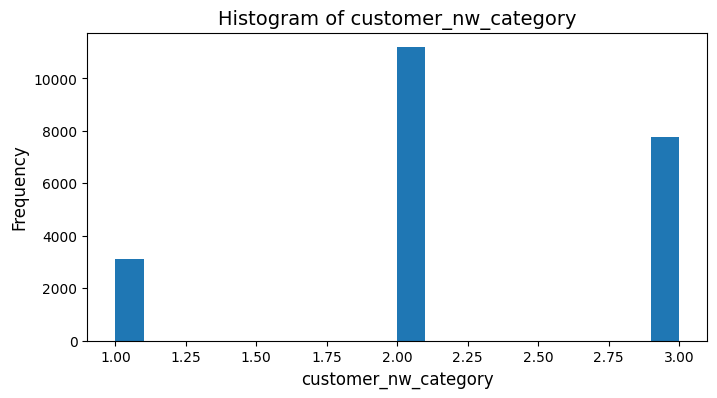

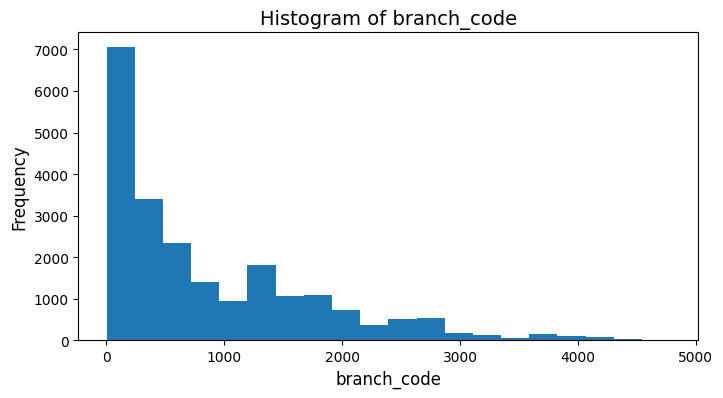

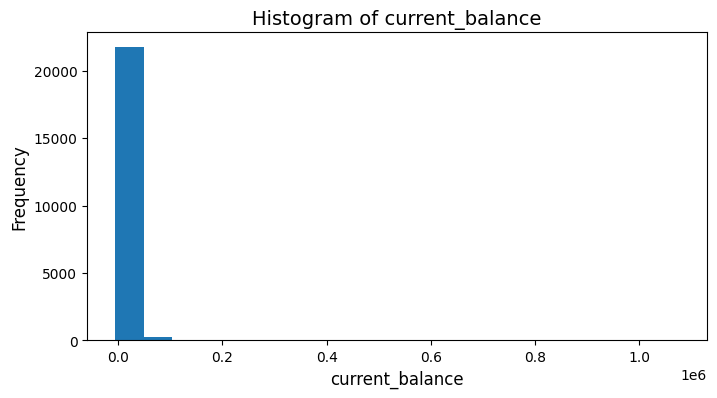

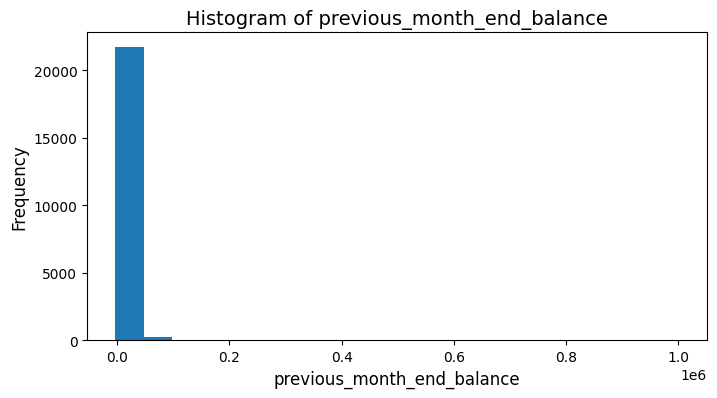

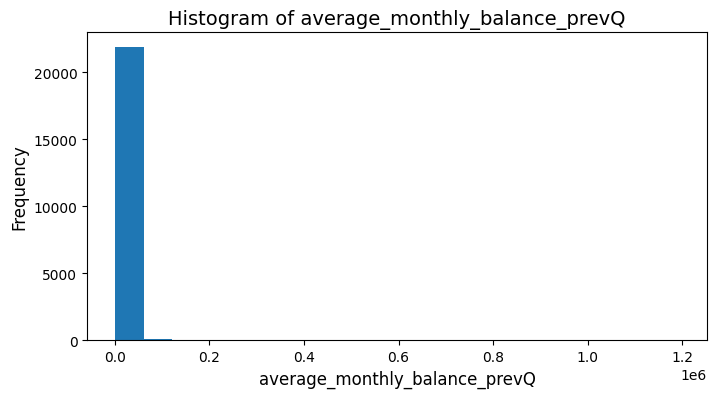

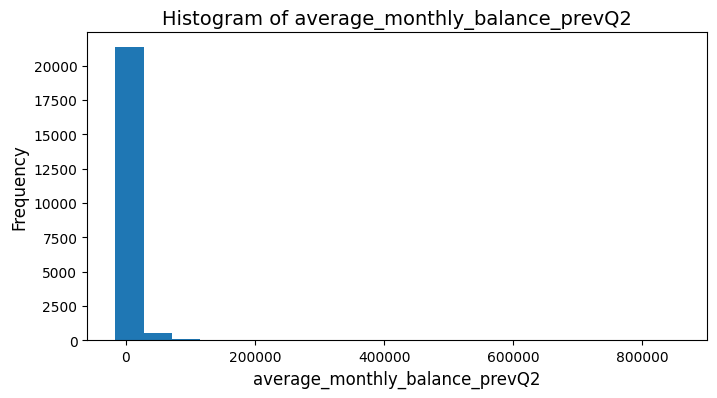

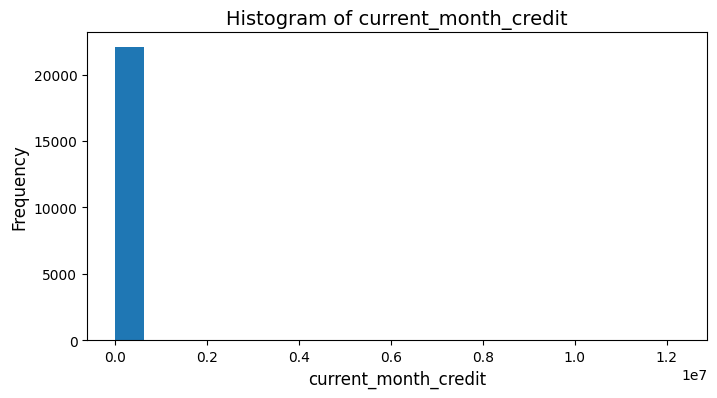

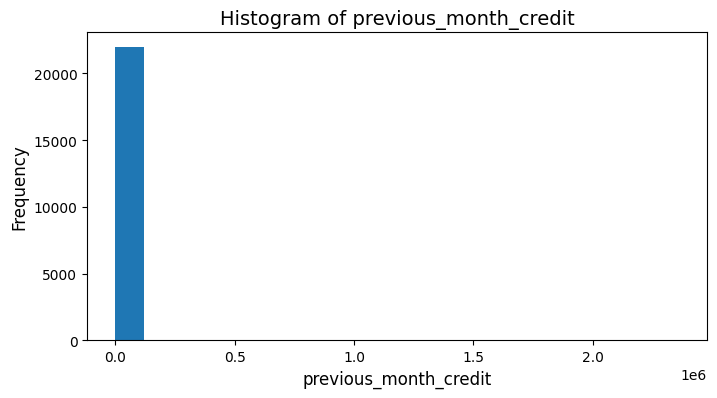

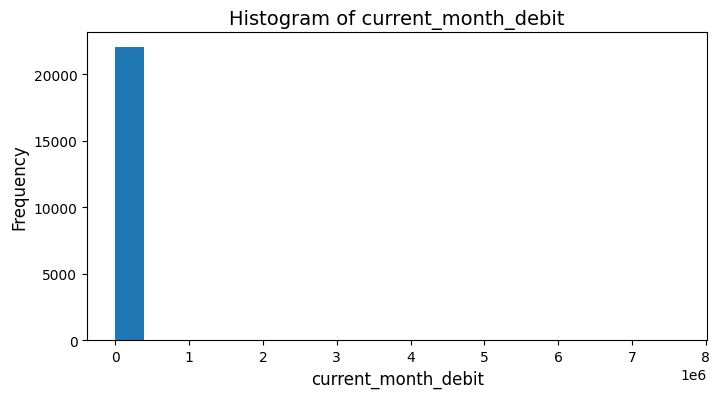

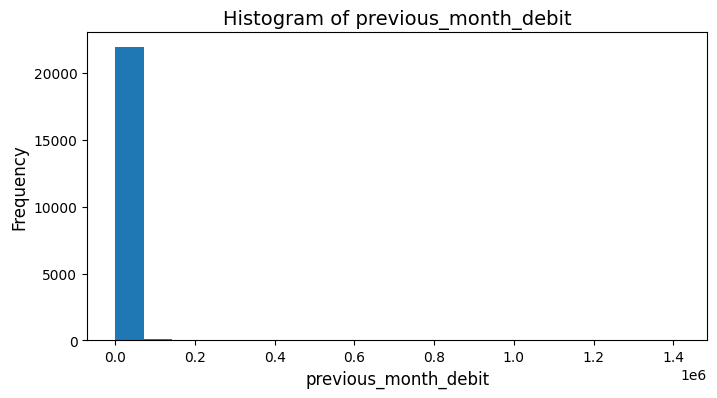

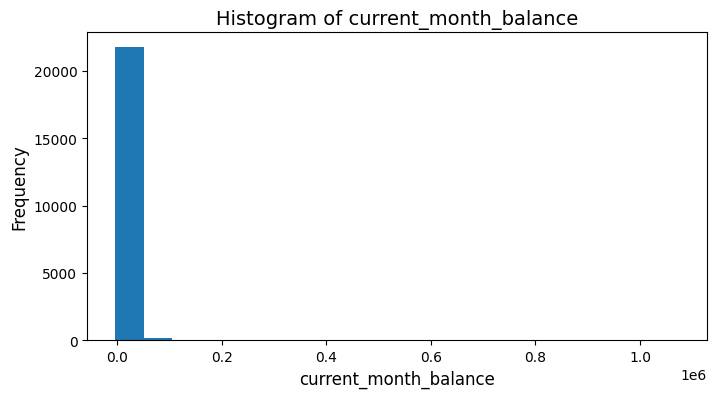

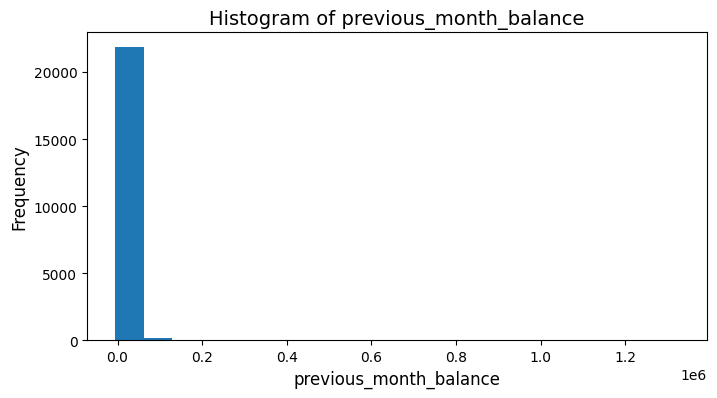

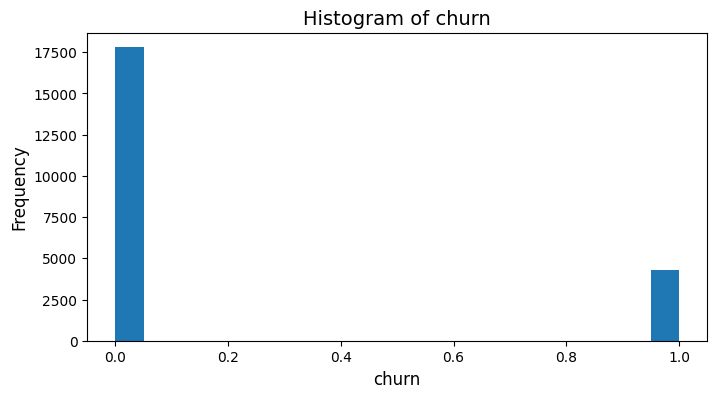

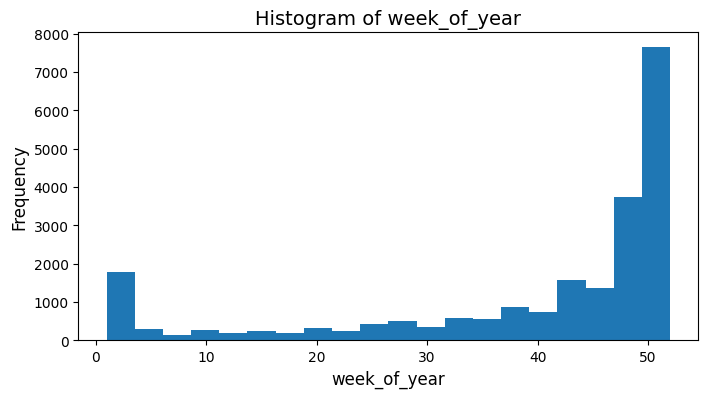

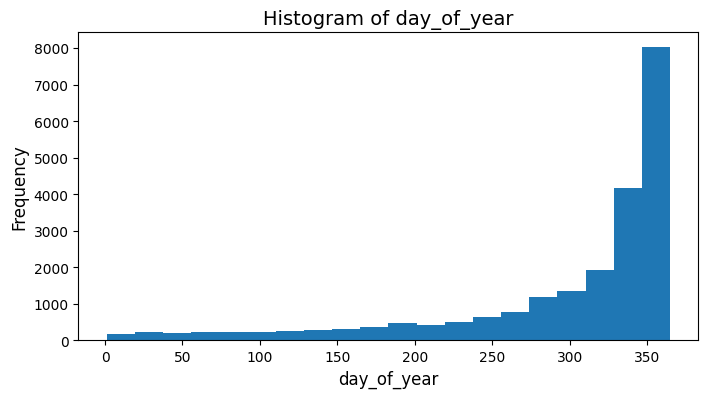

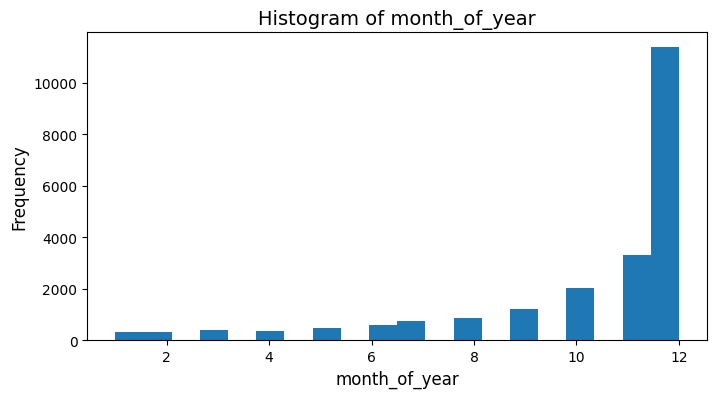

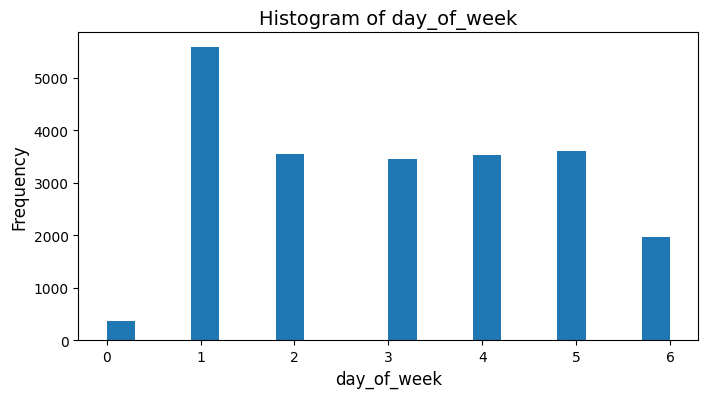

In [348]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.hist(df[column].dropna(), bins=20)
    plt.title(f'Histogram of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()

### Categorical

In [349]:
import plotly.express as px

path = "/Users/irene/CloudStation/Portfolio/Bank Customer Churn Data Analysis/cleaned_data.csv"
df1 = pd.read_csv(path)
column='last_transaction'
fig = px.histogram(df1, x=column, nbins=100, title=f'Histogram of {column}',
                   labels={'count': 'Frequency', column: column})
fig.update_layout(xaxis_title=column, yaxis_title='Frequency', showlegend=False)
fig.show()

## Drop columns

As branch code and city has too many unique values, we dicided to drop these two columns, as well as customer ID as it is not influential for our analysis

we already converted last transaction into week / month / day / year so we could also drop it

In [350]:
# check unique values in each column
df.nunique()

customer_id                       22067
vintage                            1404
age                                  90
gender                                2
dependents                           15
occupation                            5
city                               1388
customer_nw_category                  3
branch_code                        2888
current_balance                   21787
previous_month_end_balance        21808
average_monthly_balance_prevQ     21725
average_monthly_balance_prevQ2    21818
current_month_credit               9561
previous_month_credit              9841
current_month_debit               12218
previous_month_debit              12476
current_month_balance             21826
previous_month_balance            21799
churn                                 2
last_transaction                    357
week_of_year                         52
day_of_year                         356
month_of_year                        12
day_of_week                           7


In [351]:
df = df.drop(['city','branch_code','last_transaction'], axis=1)

We dropped the columns (non-continuous data) with too many unique values and a column with datatime data type

## One-hot encoding

As logistic regression model couldn't understand categorical data, we applied one-hot encoding to transformed categorical data into numeric values.

In [352]:
df = pd.get_dummies(df, columns=["gender","occupation","customer_nw_category"], drop_first=True)

## Ordinal encoding

In [89]:
# gender
# df["gender"].unique()

KeyError: 'gender'

In [62]:
# gender
# encoder = OrdinalEncoder(categories=[['Male', 'Female']])
# df["gender"] = encoder.fit_transform(df[["gender"]]) # transform data
# df["gender"] = df["gender"].astype('int64')

In [63]:
# occupation
# df["occupation"].unique()

array(['self_employed', 'retired', 'salaried', 'student', 'company'],
      dtype=object)

In [64]:
# occupation
# encoder = OrdinalEncoder(categories=[['self_employed', 'salaried', 'retired', 'student', 'company']])
# df["occupation"] = encoder.fit_transform(df[["occupation"]]) # transform data
# df["occupation"] = df["occupation"].astype('int64')

## Correlation matrix

In [96]:
correlation_matrix = df.corr()

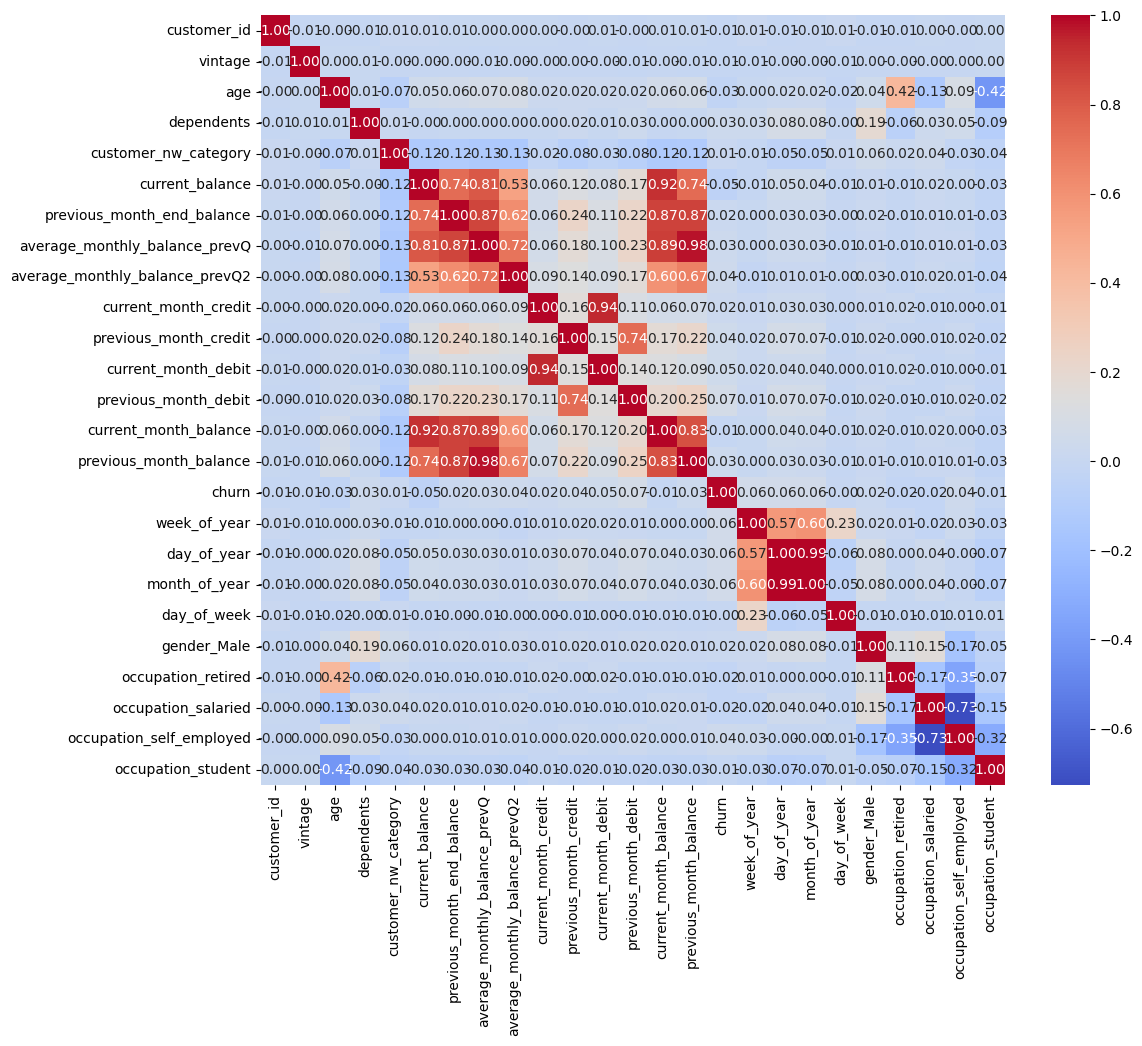

In [98]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

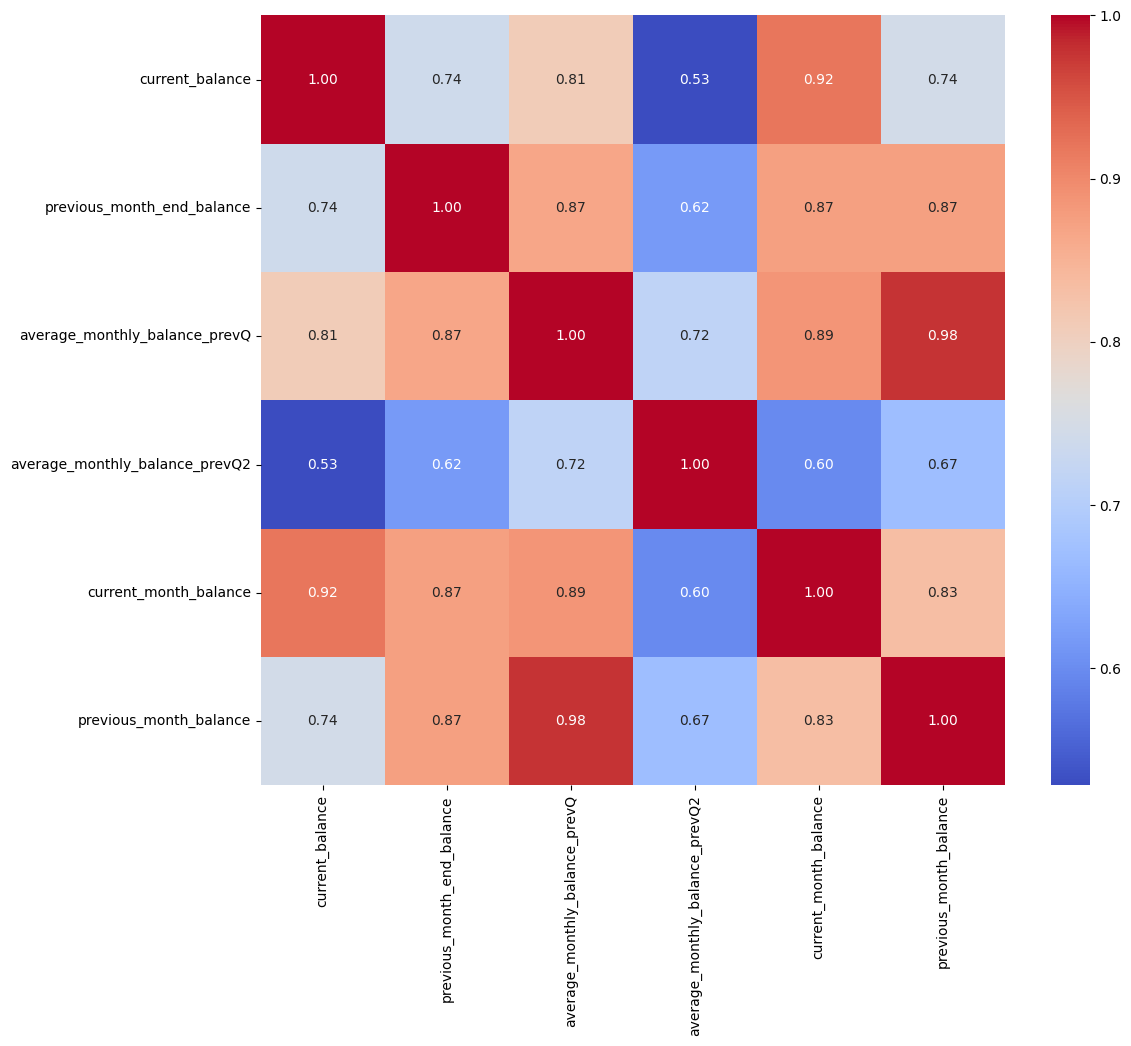

In [159]:
ba = df[['current_balance', 'previous_month_end_balance', 'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2', 'current_month_balance', 'previous_month_balance']]
correlation_balance = ba.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_balance, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

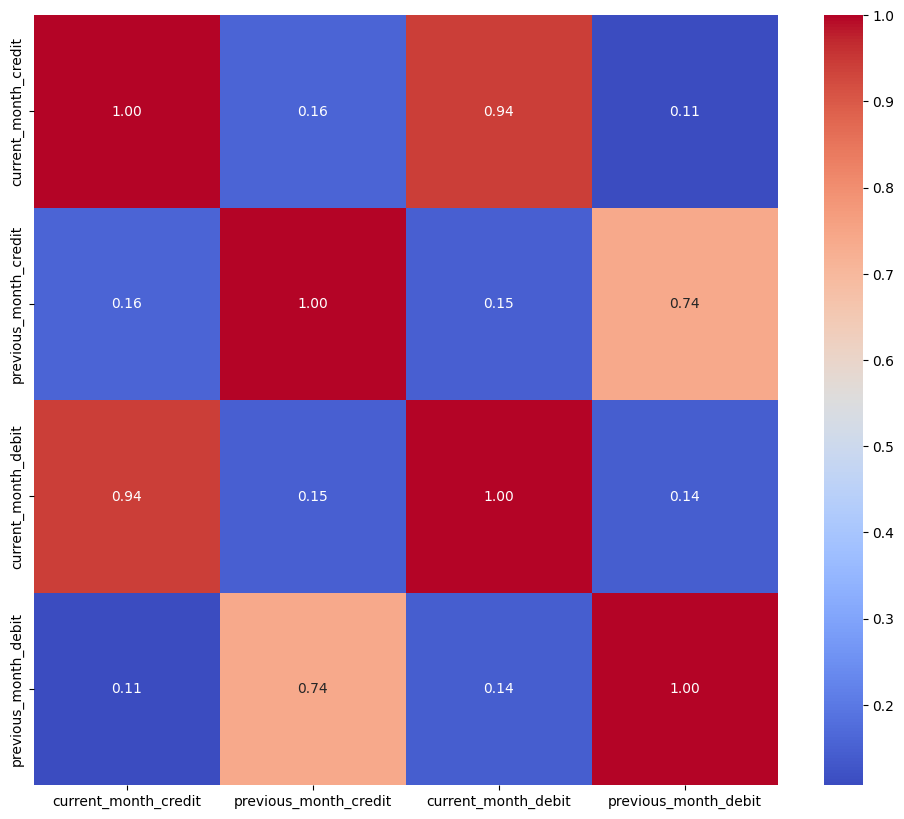

In [158]:
cb = df[['current_month_credit','previous_month_credit','current_month_debit','previous_month_debit']]
correlation_cb = cb.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_cb, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

We found the balance-related variables are highly correlated to each other, as well as credit / debit variables

It might lead to multicollinearity issues in the logistic regression model, making it difficult to interpret the individual effect of each variable

## Multicollinearity

To further investigate if there's multicollinearity truly exits in these variables, we applied VIF approach

In [236]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(bal):
    vif_data = pd.DataFrame(index=bal.columns, columns=bal.columns)
    for i in range(len(bal.columns)):
        for j in range(i + 1, len(bal.columns)):
            col_1 = bal.columns[i]
            col_2 = bal.columns[j]
            
            balance = bal[[col_1, col_2]]
            
            vif_value = variance_inflation_factor(balance.values, 0)
            
            vif_data.at[col_1, col_2] = vif_value
            vif_data.at[col_2, col_1] = vif_value
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(vif_data.astype(float), annot=True, cmap='coolwarm', fmt=".2f", vmin=0, vmax=10)
    plt.title('VIF Heatmap')
    plt.show()

    return vif_data


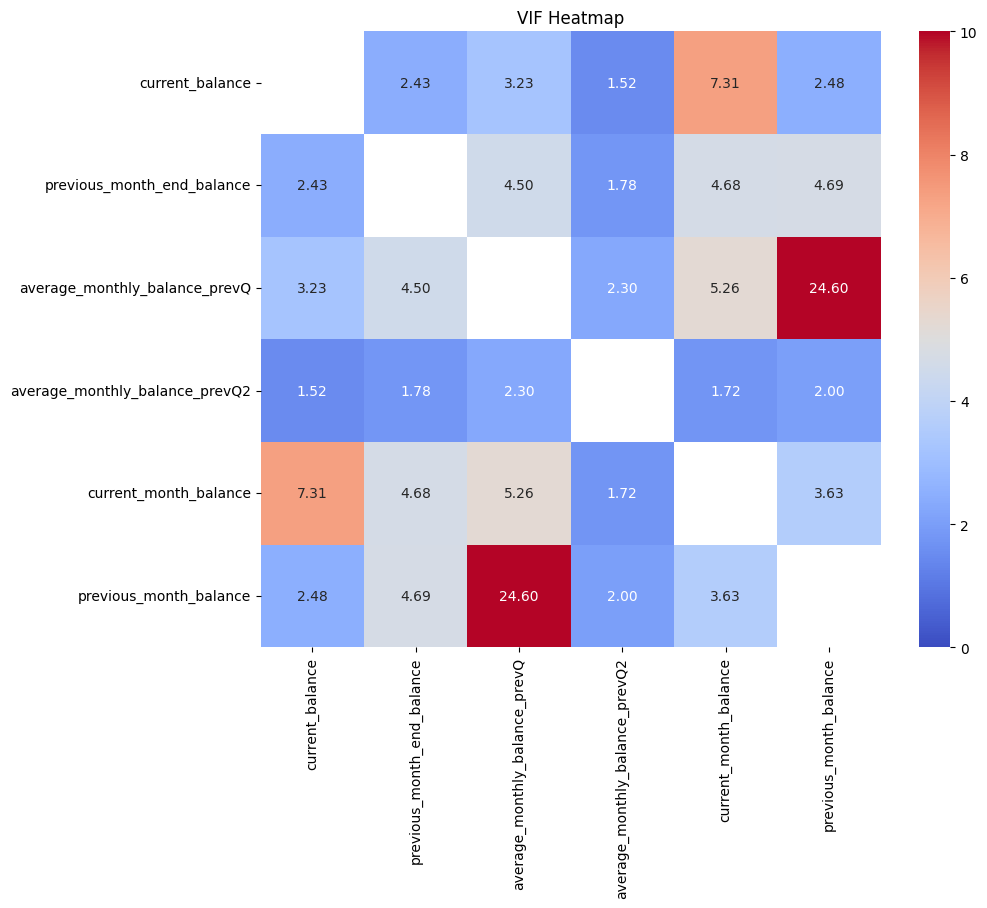

,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_balance,previous_month_balance
current_balance,NaN,2.432557,3.228598,1.520265,7.309034,2.477909
previous_month_end_balance,2.432557,NaN,4.499946,1.780859,4.684068,4.688798
average_monthly_balance_prevQ,3.228598,4.499946,NaN,2.295469,5.259234,24.595225
average_monthly_balance_prevQ2,1.520265,1.780859,2.295469,NaN,1.722643,2.003464
current_month_balance,7.309034,4.684068,5.259234,1.722643,NaN,3.626994
previous_month_balance,2.477909,4.688798,24.595225,2.003464,3.626994,NaN


In [268]:
balance = df[['current_balance', 'previous_month_end_balance', 'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2', 'current_month_balance', 'previous_month_balance']]
calculate_vif(balance)

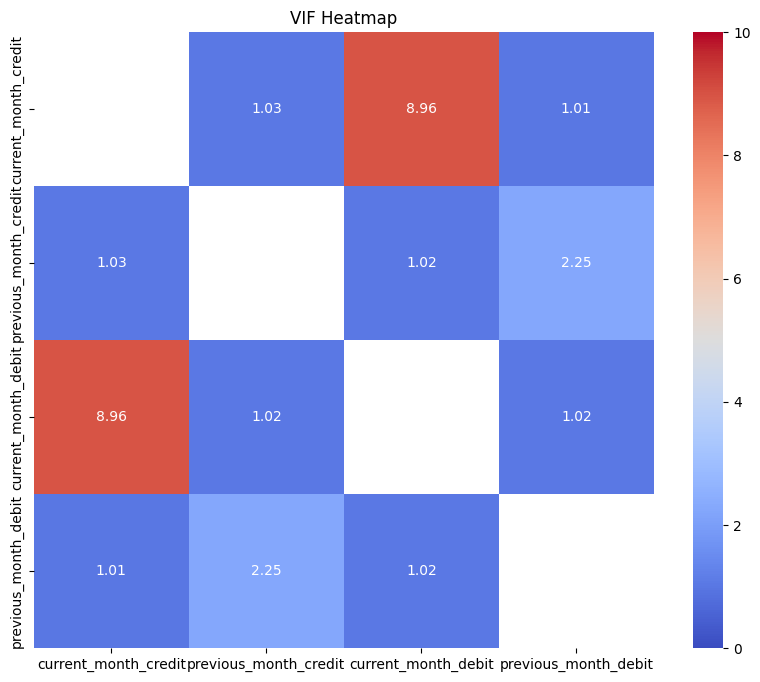

,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit
current_month_credit,NaN,1.026934,8.960647,1.012722
previous_month_credit,1.026934,NaN,1.024443,2.249087
current_month_debit,8.960647,1.024443,NaN,1.023733
previous_month_debit,1.012722,2.249087,1.023733,NaN


In [269]:
cb = df[['current_month_credit','previous_month_credit','current_month_debit','previous_month_debit']]
calculate_vif(cb)

Generally, a VIF above 5 indicates a high multicollinearity

In summary, the variables below have high values of VIF, indicating that these variables are highly correlated to one another.

* balance 

  * current balance & current_month_balance

  * average_monthly_balance_prevQ & previous_month_balance

  * current balance & average_monthly_balance_prevQ


* credit / debit 

  * current_month_credit & current_month_debit

In [239]:
import plotly.graph_objects as go
import pandas as pd
from plotly.subplots import make_subplots

# Assuming ds1 is your DataFrame
# Replace 'Exited' and 'Balance' with the actual column names in your DataFrame

fig = make_subplots(rows=1, cols=1)

# Non-churned histogram
non_churned_data = df.loc[df['churn'] == 0, 'current_balance']
hist_non_churned = go.Histogram(x=non_churned_data, opacity=0.6, name="Non-churned")

# Churned histogram
churned_data = df.loc[df['churn'] == 1, 'current_balance']
hist_churned = go.Histogram(x=churned_data, opacity=0.6, name="Churned")

fig.add_trace(hist_non_churned)
fig.add_trace(hist_churned)

fig.update_layout(barmode="overlay", xaxis=dict(title='Balance ($)'), title="Balance Distribution")
fig.show()


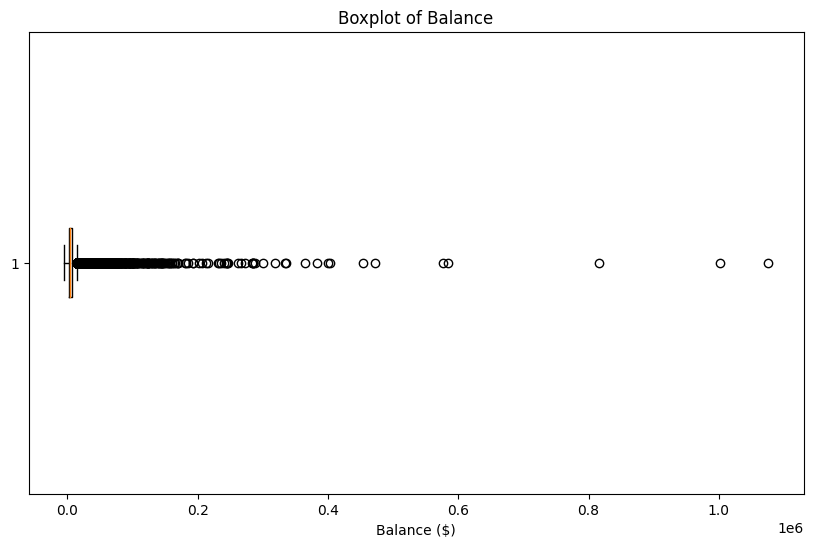

In [242]:
import matplotlib.pyplot as plt

# Assuming ds1 is your DataFrame
# Replace 'Balance' with the actual column name in your DataFrame

# Boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(df['current_balance'], vert=False)
plt.title('Boxplot of Balance')
plt.xlabel('Balance ($)')
plt.show()


## Logi Model

To select the variables to feed into our final model, we will apply logistic regression by feeding these variables which have multicollinearity with one another to see which varaible is more influential to the Y (churn)

In [261]:
def logi_obyo(res,pre):
    for p in pre:
        formula = f"{res} ~ {p}"
        model = sm.Logit.from_formula(formula, data=df)
        result = model.fit()
        print(result.summary())
        
def logi_obyo_pvalues(res,pre):
    p_values_dict = {'Variable': [], 'P-value': [], 'Rounded P-value': []}
    for p in pre:
        formula = f"{res} ~ {p}"
        model = sm.Logit.from_formula(formula, data=df)
        result = model.fit()
        p_value = result.pvalues[p]
    
        p_values_dict['Variable'].append(p)
        p_values_dict['P-value'].append(p_value)
        p_values_dict['Rounded P-value'].append(round(p_value, 3))

    p_values_df = pd.DataFrame(p_values_dict)
    p_values_df_sorted = p_values_df.sort_values(by='P-value')
    return p_values_df_sorted

### Balance columns

we start with putting variables one by one

In [257]:
res = 'churn'
pre = ['current_balance', 'previous_month_end_balance', 'average_monthly_balance_prevQ', 
                       'average_monthly_balance_prevQ2', 'current_month_balance', 'previous_month_balance']
logi_obyo(res,pre)

Optimization terminated successfully.
         Current function value: 0.488763
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                22067
Model:                          Logit   Df Residuals:                    22065
Method:                           MLE   Df Model:                            1
Date:                Sun, 14 Jan 2024   Pseudo R-squ.:                0.005607
Time:                        15:47:02   Log-Likelihood:                -10786.
converged:                       True   LL-Null:                       -10846.
Covariance Type:            nonrobust   LLR p-value:                 2.785e-28
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.3033      0.021    -61.942      0.000      -1.345      -1.262
current_balanc

In [262]:
logi_obyo_pvalues(res,pre)

Optimization terminated successfully.
         Current function value: 0.488763
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.491409
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.491169
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.491009
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.491447
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.491044
         Iterations 5


,Variable,P-value,Rounded P-value
0,current_balance,5.936717e-19,0.000
3,average_monthly_balance_prevQ2,5.246886e-06,0.000
5,previous_month_balance,2.608427e-05,0.000
2,average_monthly_balance_prevQ,1.921067e-04,0.000
1,previous_month_end_balance,2.308274e-02,0.023
4,current_month_balance,1.013860e-01,0.101


We set the significance level at 0.05

Since current_month_balance is not as significant as the others, we will exclude it from our final model

Since <mark>current_balance</mark> is the most influential, we will include it in our final model

Although average_monthly_balance_prevQ2 is the second most significant, it has multicollinearity with current_balance, so we will exclude it as well

Because previous_month_balance and average_monthly_balance_prevQ are highly correlated, we will include <mark>previous_month_balance</mark>, which is more significant than average_monthly_balance_prevQ

Although previous_month_end_balance is slightly significant, it exhibits a slight correlation with previous_month_balance (VIF 4.69). Therefore, we will also exclude it from our analysis


### Credit / Debit columns

In [263]:
res = 'churn'
pre = ['current_month_credit','previous_month_credit','current_month_debit','previous_month_debit']
logi_obyo(res,pre)

Optimization terminated successfully.
         Current function value: 0.491071
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                22067
Model:                          Logit   Df Residuals:                    22065
Method:                           MLE   Df Model:                            1
Date:                Sun, 14 Jan 2024   Pseudo R-squ.:               0.0009114
Time:                        15:48:46   Log-Likelihood:                -10836.
converged:                       True   LL-Null:                       -10846.
Covariance Type:            nonrobust   LLR p-value:                 8.732e-06
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.4354      0.017    -83.341      0.000      -1.469      -1.402

In [264]:
logi_obyo_pvalues(res,pre)

Optimization terminated successfully.
         Current function value: 0.491071
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.490772
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.488058
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.488942
         Iterations 6


,Variable,P-value,Rounded P-value
2,current_month_debit,7.984869e-24,0.0
3,previous_month_debit,2.785098e-17,0.0
1,previous_month_credit,1.895704e-06,0.0
0,current_month_credit,2.601487e-04,0.0


Since <mark>current_month_debit</mark> is the most influential, we will include it in our final model

Although previous_month_debit is the second most significant, it has multicollinearity with current_month_debit, so we will exclude it as well

## Pearson’s Chi-Square Test

We applied Pearson’s Chi-Square Test to test for independence between categorical variables

In [383]:
path = "/Users/irene/CloudStation/Portfolio/Bank Customer Churn Data Analysis/cleaned_data.csv"
df1 = pd.read_csv(path)
df2 = df.copy()

In [367]:
from scipy.stats import chi2_contingency

def chi2(y,x):
    contingency_table = pd.crosstab(df[y], df[x])
    chi2, p, _, _ = chi2_contingency(contingency_table, correction=True)

    print(f"Pearson's Chi-squared test","Y:",y,"X:",x)
    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (H0 holds true)')

In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22067 entries, 0 to 22066
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   dependents                      22067 non-null  int64  
 4   current_balance                 22067 non-null  float64
 5   previous_month_end_balance      22067 non-null  float64
 6   average_monthly_balance_prevQ   22067 non-null  float64
 7   average_monthly_balance_prevQ2  22067 non-null  float64
 8   current_month_credit            22067 non-null  float64
 9   previous_month_credit           22067 non-null  float64
 10  current_month_debit             22067 non-null  float64
 11  previous_month_debit            22067 non-null  float64
 12  current_month_balance           

### gender

In [369]:
y="churn"
x="gender_Male"
chi2(y,x)

Pearson's Chi-squared test Y: churn X: gender_Male
p value is 0.0023752249957388395
Dependent (reject H0)


p-value<0.05 ==> gender_Male may not be independent of churn

It can be assumed that there is a significant relationship between <mark>gender_Male</mark> and churn. So, this variable will be included into final model.

### occupation

In [370]:
from scipy import stats

dummies = pd.get_dummies(df1['occupation'])

for series in dummies:
    nl = "\n"
    
    crosstab = pd.crosstab(dummies[f"{series}"], df1['churn'])
    print(crosstab, nl)
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}")

churn        0     1
company             
False    17772  4271
True        21     3 

Chi2 value= 0.3522429354645956
p-value= 0.5528461966262379
Degrees of freedom= 1

churn        0     1
retired             
False    16418  4011
True      1375   263 

Chi2 value= 12.200659616366387
p-value= 0.00047772621263290254
Degrees of freedom= 1

churn         0     1
salaried             
False     13183  3282
True       4610   992 

Chi2 value= 13.110898842343767
p-value= 0.0002935827954811482
Degrees of freedom= 1

churn              0     1
self_employed             
False           7132  1501
True           10661  2773 

Chi2 value= 35.44501516384739
p-value= 2.6235294900763694e-09
Degrees of freedom= 1

churn        0     1
student             
False    16667  4031
True      1126   243 

Chi2 value= 2.3377852075700405
p-value= 0.12626896696306802
Degrees of freedom= 1



It can be assumed that there is a significant relationship between <mark>occupation_self_employed / occupation_salaried / occupation_retired</mark> and churn. So, these variable will be included into final model

### customer_nw_category

In [376]:
y="churn"
x="customer_nw_category_3"
chi2(y,x)

TypeError: 'numpy.float64' object is not callable

In [384]:
df1["customer_nw_category"] = df1["customer_nw_category"].astype(object)

In [388]:
dummies = pd.get_dummies(df1['customer_nw_category'], prefix='customer_nw')

for col in dummies.columns:
    nl = "\n"
    
    crosstab = pd.crosstab(dummies[col], df1['churn'])
    print(crosstab, nl)
    
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}")


churn              0     1
customer_nw_1             
False          15306  3658
True            2487   616 

Chi2 value= 0.5050014420935711
p-value= 0.4773107367296566
Degrees of freedom= 1

churn             0     1
customer_nw_2            
False          8692  2192
True           9101  2082 

Chi2 value= 8.085561632313198
p-value= 0.004461930113528253
Degrees of freedom= 1

churn              0     1
customer_nw_3             
False          11588  2698
True            6205  1576 

Chi2 value= 5.956512883251108
p-value= 0.014663014454598456
Degrees of freedom= 1



It can be assumed that there is a significant relationship between <mark>customer_nw_2 / customer_nw_3</mark> and churn. So, these variable will be included into final model

# Final Logi Model

In [483]:
def smlogit(y,X):
    mod = sm.Logit(y,X)
    res = mod.fit()
    aic = -2 * res.llf + 2 * len(res.params)
    print(res.summary())
    print(f"AIC: {aic}")

In [491]:
from patsy import dmatrices
import numpy as np

y,X = dmatrices('churn ~ age + np.log(current_balance)', data = df, return_type = 'dataframe')
y2,X2 = dmatrices('churn ~ age + np.log(current_balance) + vintage', data = df, return_type = 'dataframe')
y3,X3 = dmatrices('churn ~ age + np.log(current_balance) + vintage + dependents', data = df, return_type = 'dataframe')
y4,X4 = dmatrices('churn ~ age + np.log(current_balance) + vintage + dependents + np.log(previous_month_balance)', data = df, return_type = 'dataframe')
y5,X5 = dmatrices('churn ~ age + np.log(current_balance) + vintage + dependents + np.log(previous_month_balance) + np.log(current_month_debit)', data = df, return_type = 'dataframe')
y6,X6 = dmatrices('churn ~ age + np.log(current_balance) + vintage + dependents + np.log(previous_month_balance) + np.log(current_month_debit) + gender_Male', data = df, return_type = 'dataframe')
y7,X7 = dmatrices('churn ~ age + np.log(current_balance) + vintage + dependents + np.log(previous_month_balance) + np.log(current_month_debit) + gender_Male + occupation_retired', data = df, return_type = 'dataframe')
y8,X8 = dmatrices('churn ~ age + np.log(current_balance) + vintage + dependents + np.log(previous_month_balance) + np.log(current_month_debit) + gender_Male + occupation_retired + occupation_salaried', data = df, return_type = 'dataframe')
y9,X9 = dmatrices('churn ~ age + np.log(current_balance) + vintage + dependents + np.log(previous_month_balance) + np.log(current_month_debit) + gender_Male + occupation_retired + occupation_salaried + occupation_self_employed', data = df, return_type = 'dataframe')
y10,X10 = dmatrices('churn ~ age + np.log(current_balance) + vintage + dependents + np.log(previous_month_balance) + np.log(current_month_debit) + gender_Male + occupation_retired + occupation_salaried + occupation_student', data = df, return_type = 'dataframe')
y11,X11 = dmatrices('churn ~ age + np.log(current_balance) + vintage + dependents + np.log(previous_month_balance) + np.log(current_month_debit) + gender_Male + occupation_retired + occupation_salaried + occupation_student + customer_nw_category_3', data = df, return_type = 'dataframe')
y12,X12 = dmatrices('churn ~ age + np.log(current_balance) + vintage + dependents + np.log(previous_month_balance) + np.log(current_month_debit) + gender_Male + occupation_retired + occupation_salaried + occupation_student + customer_nw_category_3 + customer_nw_category_2', data = df, return_type = 'dataframe')

/opt/anaconda3/envs/DL/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

invalid value encountered in log

/opt/anaconda3/envs/DL/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

invalid value encountered in log

/opt/anaconda3/envs/DL/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

invalid value encountered in log

/opt/anaconda3/envs/DL/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

invalid value encountered in log

/opt/anaconda3/envs/DL/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

invalid value encountered in log

/opt/anaconda3/envs/DL/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

invalid value encountered in log

/opt/anaconda3/envs/DL/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

invalid value encountered in log

/opt/anaconda3/envs/DL/lib/python3.11/site-packages/pandas/core/array

In [492]:
smlogit(y,X)
smlogit(y2,X2)
smlogit(y3,X3)
smlogit(y4,X4)
smlogit(y5,X5)
smlogit(y6,X6)
smlogit(y7,X7)
smlogit(y8,X8)
smlogit(y9,X9)
smlogit(y10,X10)
smlogit(y11,X11)
smlogit(y12,X12)

Optimization terminated successfully.
         Current function value: 0.439088
         Iterations 6


                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                22053
Model:                          Logit   Df Residuals:                    22050
Method:                           MLE   Df Model:                            2
Date:                Mon, 15 Jan 2024   Pseudo R-squ.:                  0.1057
Time:                        00:31:42   Log-Likelihood:                -9683.2
converged:                       True   LL-Null:                       -10828.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   3.8633      0.131     29.408      0.000       3.606       4.121
age                        -0.0020      0.001     -1.802      0.072      -0.004       0.000


Comparison:

1. Pseudo R2 (R2 Tjur) The best model - model11 / model12 (since it has the higher r2)

2. AIC The best model - model11 (since they has the lowest value of AIC)

3. Log-Likelihood The best model - model12 (since it has higher log-Likelihood)

So, choosing between model4 and model5. Comparing them by ANOVA (analysis of deviance)

In [500]:
from statsmodels.formula.api import ols

formula = 'churn ~ age + np.log(current_balance) + vintage + dependents + np.log(previous_month_balance) + np.log(current_month_debit) + gender_Male + occupation_retired + occupation_salaried + occupation_student + customer_nw_category_3'
model11_a = ols(formula, data=df).fit()

# Perform ANOVA
anova_result = sm.stats.anova_lm(model11_a, test="Chisq")

# Display the ANOVA results
anova_result


/opt/anaconda3/envs/DL/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

invalid value encountered in log

/opt/anaconda3/envs/DL/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

invalid value encountered in log

/opt/anaconda3/envs/DL/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

invalid value encountered in log



,df,sum_sq,mean_sq,Chisq,PR(>Chisq)
age,1.0,3.285252,3.285252,0.0,0.0
np.log(current_balance),1.0,362.291317,362.291317,0.0,0.0
vintage,1.0,0.052860,0.052860,0.0,0.0
dependents,1.0,2.602086,2.602086,0.0,0.0
np.log(previous_month_balance),1.0,163.897813,163.897813,0.0,0.0
np.log(current_month_debit),1.0,67.966415,67.966415,0.0,0.0
gender_Male,1.0,0.010254,0.010254,0.0,0.0
occupation_retired,1.0,0.325188,0.325188,0.0,0.0
occupation_salaried,1.0,3.642151,3.642151,0.0,0.0
occupation_student,1.0,0.374323,0.374323,0.0,0.0


In [501]:
formula = 'churn ~ age + np.log(current_balance) + vintage + dependents + np.log(previous_month_balance) + np.log(current_month_debit) + gender_Male + occupation_retired + occupation_salaried + occupation_student + customer_nw_category_3 + customer_nw_category_2'
model12_a = ols(formula, data=df).fit()

# Perform ANOVA
anova_result = sm.stats.anova_lm(model12_a, test="Chisq")

# Display the ANOVA results
anova_result

/opt/anaconda3/envs/DL/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

invalid value encountered in log

/opt/anaconda3/envs/DL/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

invalid value encountered in log

/opt/anaconda3/envs/DL/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

invalid value encountered in log



,df,sum_sq,mean_sq,Chisq,PR(>Chisq)
age,1.0,3.285252,3.285252,0.0,0.0
np.log(current_balance),1.0,362.291317,362.291317,0.0,0.0
vintage,1.0,0.052860,0.052860,0.0,0.0
dependents,1.0,2.602086,2.602086,0.0,0.0
np.log(previous_month_balance),1.0,163.897813,163.897813,0.0,0.0
np.log(current_month_debit),1.0,67.966415,67.966415,0.0,0.0
gender_Male,1.0,0.010254,0.010254,0.0,0.0
occupation_retired,1.0,0.325188,0.325188,0.0,0.0
occupation_salaried,1.0,3.642151,3.642151,0.0,0.0
occupation_student,1.0,0.374323,0.374323,0.0,0.0


In [502]:
anova_result = sm.stats.anova_lm(model11_a, model12_a, test="Chisq")
anova_result

,df_resid,ssr,df_diff,ss_diff,Chisq,Pr(>Chisq)
0,22038.0,2834.294025,0.0,NaN,0.0,0.0
1,22037.0,2833.992547,1.0,0.301478,0.0,0.0


The p-value associated with the Chisq test is 0.0. A very low p-value suggests that the additional parameter in model12 a significantly improves the fit compared to model11.

With a low p-value, we would typically reject the null hypothesis that the simpler model (model11) is sufficient, indicating that the more complex model (model12) provides a significantly better fit to the data

We will choose model12 to be our final model

In [503]:
smlogit(y12,X12)

Optimization terminated successfully.
         Current function value: 0.406935
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                22050
Model:                          Logit   Df Residuals:                    22037
Method:                           MLE   Df Model:                           12
Date:                Mon, 15 Jan 2024   Pseudo R-squ.:                  0.1712
Time:                        01:07:41   Log-Likelihood:                -8972.9
converged:                       True   LL-Null:                       -10827.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          0.0288      0.243      0.119     

Non-significant predictors are vintage, dependents, gender_Male, occupation_retired, occupation_student, customer_nw_category_3, customer_nw_category_2

1. occupation_salaried - the log of odds ratio for people with salary will be lower by 0.2 in comparison with non-salaried group. It indicates that people who are employeed are not more likely to be a churner

2. Age - each additional year of age, the log-odds of the dependent variable decrease by approximately 0.0043 units. It indicates that people who are older are not more likely to be a churner

3. current_balance - as the natural logarithm of current_balance increases by one unit, the log-odds of the dependent variable (churn) decrease by approximately 0.9332 units. It indicates people who have more current_balance are not likely to be a churner.

4. current_month_debit - for each one unit increase in the natural logarithm of the current_month_debit, the log-odds of the dependent variable (churn) increase by approximately 0.0891 units. It indicates an increase in the current month's debit is associated with an increase in the likelihood of churn.

5. previous_month_balance -  for each one unit increase in the natural logarithm of the previous_month_balance, the log-odds of the dependent variable (churn) increase by approximately 0.7119 units. An increase in the previous month's balance is associated with a significant increase in the likelihood of churn.

# Predictive Model

In [531]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, mean_squared_error, classification_report, confusion_matrix, RocCurveDisplay, auc

In [579]:
Y = df["churn"]
X = df.drop(columns=["churn"])

X_train, otherX, Y_train, otherY = train_test_split(X, Y, test_size=0.7, random_state=726)
X_test, X_val, Y_test, Y_val = train_test_split(otherX, otherY, test_size=0.7, random_state=2000)


In [580]:
lr = LogisticRegression(max_iter=200, random_state=42)

lr.fit(X_train, Y_train)

y_pre_lo = lr.predict(X_test)

print("test accuracy", accuracy_score(Y_test,y_pre_lo)*100)

test accuracy 81.54941735002159


/opt/anaconda3/envs/DL/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [581]:
auc_score = roc_auc_score(Y_test, y_pre_lo)
auc_score

0.5490480971369853

AUC can help decide which categorization method is better. AUC under whichever is highest is the most suitable method of machine learning. AUC score of 0.54 suggests that the model can distinguish between the classes with a moderate level of accuracy.

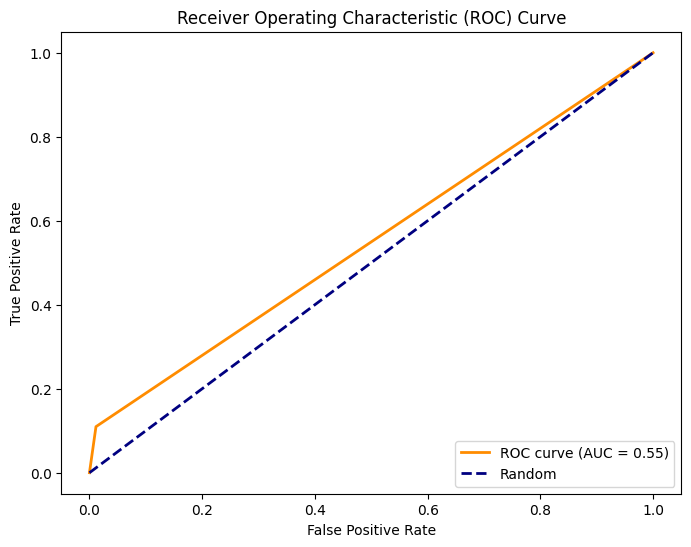

In [582]:
# Calculate ROC curve
fpr, tpr, _ = roc_curve(Y_test, y_pre_lo)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

AUC can help decide which categorization method is better. AUC under whichever is highest is the most suitable method of machine learning. AUC score of 0.53 suggests that the model can distinguish between the classes with a moderate level of accuracy.

In [583]:
print(classification_report(Y_test, y_pre_lo))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      3722
           1       0.70      0.11      0.19       912

    accuracy                           0.82      4634
   macro avg       0.76      0.55      0.54      4634
weighted avg       0.80      0.82      0.76      4634



For class 0, the precision is 0.82, which means that out of all instances predicted as class 0, 82% of them are actually true positives. This implies that 81% of the customers from all the customers predicted to stay, actually keep using the bank's service. Similarly, for class 1, the precision is also 0.70, indicating that 70% of instances predicted as class 1 are true positives implying customers actually leaving the bank.  

For class 0, the recall is 0.99, meaning that the model identifies 99% of the actual instances belonging to class 0. For class 1, the recall is 0.11, indicating that the model captures 11% of the actual instances belonging to class 1.

For class 0, the F1-score is 0.90, representing the overall balance between precision and recall for that class, while for class 1, the F1-score is 0.19.

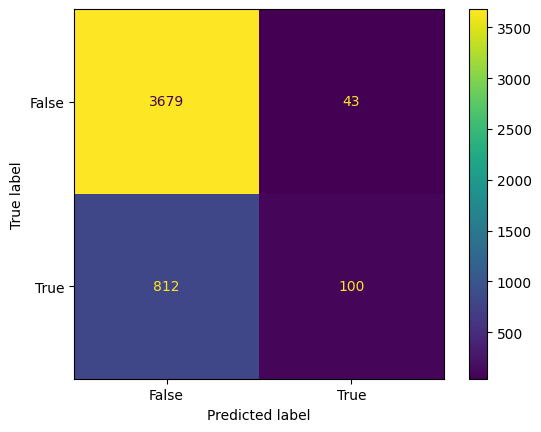

In [584]:
confusion_matrix_lr = confusion_matrix(Y_test, y_pre_lo)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_lr, display_labels = [False, True])

cm_display.plot()
plt.show()

The 2x2 array confusion matrix helps us understand the performance of a classification model. Based on the above confusion matrix, there are 3679 instances that were correctly predicted as negative i.e., customers not leaving the bank identified as not leaving. Additionally, there are 100 instances of customers likely to leave the bank identified correctly i.e., true positives.

# Random forest

In [539]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor

In [540]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, Y_train)

y_pred_random = rf.predict(X_test)

rf.score(X_train, Y_train)

print("test accuracy", accuracy_score(Y_test,y_pred_random)*100)

test accuracy 84.82952093223997


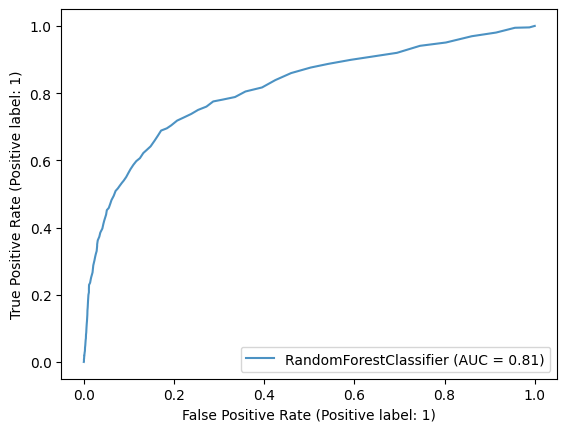

In [541]:
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rf, X_test, Y_test, ax=ax, alpha=0.8)

In [546]:
print(classification_report(Y_test, y_pred_random))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      3722
           1       0.70      0.40      0.51       912

    accuracy                           0.85      4634
   macro avg       0.78      0.68      0.71      4634
weighted avg       0.83      0.85      0.83      4634



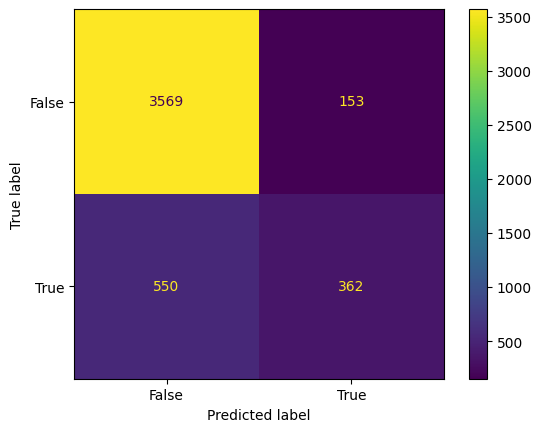

In [561]:
confusion_matrix_lr = confusion_matrix(Y_test, y_pred_random)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_lr, display_labels = [False, True])

cm_display.plot()
plt.show()

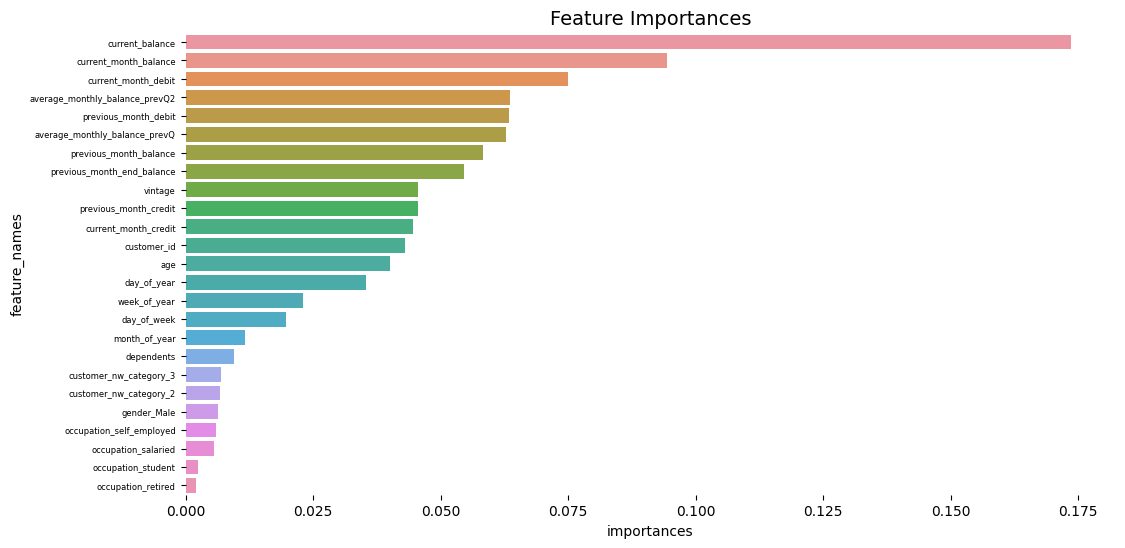

In [573]:
importances_df = pd.DataFrame({
    "feature_names": rf.feature_names_in_,
    "importances": rf.feature_importances_
})

importances_df = importances_df.sort_values(by="importances", ascending=False)

plt.figure(figsize=(12, 6))
g = sns.barplot(y=importances_df["feature_names"], x=importances_df["importances"], orient='h')
g.set_title("Feature Importances", fontsize=14)
plt.tick_params(axis='y', labelsize=6)
sns.despine(bottom=True, left=True)